# Análisis bivariado
Estudio conjunto de dos variables, analizando cómo se disponen sus datos
en una distribución bidimensional de frecuencias y las técnicas estadísticas más
sencillas para cuantificar la relación entre ellas.

## Visualización
Las visualizaciones son una herramienta fundamental para entender y compartir ideas sobre los datos. La visualización correcta puede ayudar a expresar una idea central, o abrir un espacio para una investigación más profunda.

### Diagramas de dispersión
El diagrama de dispersión permite analizar si existe algún tipo de relación entre dos variables.

El diagrama de dispersión tiene las siguientes ventajas:
* Representa la relación entre dos variables de forma gráfica, lo que hace más fácil visualizar e interpretar los datos.
* Calculando la correlación de dos variables, permite cuantificar el grado de relación entre ambas.



#### Ejemplo diagrama de dispersión usando iris data

Hacer el diagrama de dispersión para la longitud y el ancho del pétalo de la setosa.

https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.datasets import load_iris   
iris_obj = load_iris()
iris = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names,index=pd.Index([i for i in range(iris_obj.data.shape[0])])).join(pd.DataFrame(iris_obj.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris_obj.target.shape[0])])))
iris # prints iris data
iris.species.replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}, inplace=True)
iris_matriz = pd.DataFrame.to_numpy(iris)

In [42]:
setosa = iris_matriz[iris_matriz[:,4]=='setosa'][:,:4]

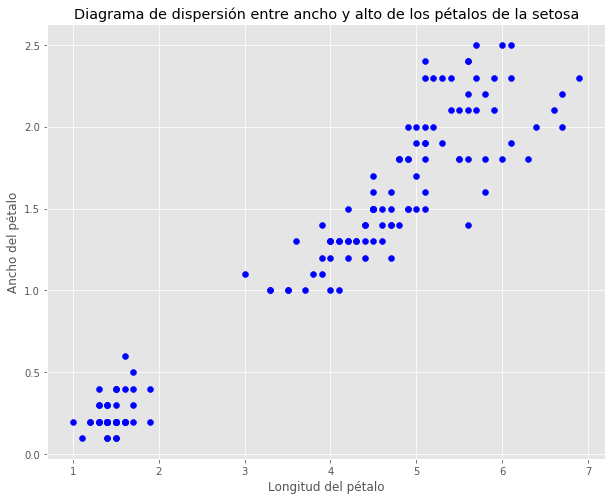

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(x=iris_matriz[:,2], y=iris_matriz[:,3], c='b', marker='o')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Diagrama de dispersión entre ancho y alto de los pétalos de la setosa')
plt.show()

#### Ejercicio
Realice el diagrama de dispersión para el caso de la longitud del pétalo y del sépalo para la especie versicola.

In [ ]:
# Ingrese su código aquí

### Diagramas de barras apilados
En un gráfico de barras apiladas, las barras se dividen en segmentos de barra coloreados que se colocan unos encima de otros. La altura total de una barra muestra el valor numérico de una categoría determinada, mientras que la altura de los segmentos de barra representa la contribución de los distintos componentes a ese valor.

In [ ]:
https://raw.githubusercontent.com/chsanabriam/Esatdistica_Aplicada/master/datasets/Olympics_country.csv

In [5]:
olympics = pd.read_csv('olympics_country.csv', sep=';')

In [6]:
olympics.head()

,Country,Gold,Silver,Bronze
0,United States,1008,811,700
1,Soviet Union,473,376,356
2,Germany,259,282,283
3,Italy,226,188,208
4,France,217,237,264


In [15]:
top10gold = olympics.sort_values(by='Gold', ascending=False)[:10]
top10gold.head(10)

,Country,Gold,Silver,Bronze
0,United States,1008,811,700
1,Soviet Union,473,376,356
2,Germany,259,282,283
3,Italy,226,188,208
4,France,217,237,264
5,Great Britain,215,258,264
6,East Germany,192,165,162
7,Sweden,185,191,217
8,China,166,133,120
9,Hungary,159,143,163


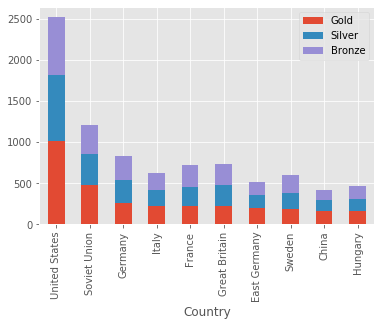

In [16]:
top10gold.plot(x='Country',kind='bar', stacked='True');

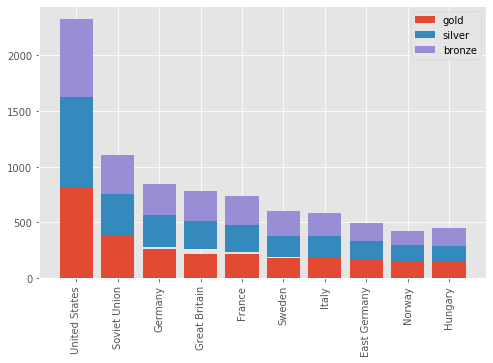

In [26]:
top10_silver_matriz = pd.DataFrame.to_numpy(top10silver)
x = top10_silver_matriz[:,0]
gold = top10_silver_matriz[:,1]
silver = top10_silver_matriz[:,2]
bronze = top10_silver_matriz[:,3]
plt.figure(figsize=(8,5))
plt.bar(x, gold, label='gold')
plt.bar(x, silver, bottom=silver,label='silver')
plt.bar(x, bronze, bottom=silver + silver,label='bronze')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Ejercicio
Organice el archivo ahora de mayor a menor en el número de medallas de plata y haga un diagrama de barras apiladas para el top 10 de ese ordenamiento.

In [ ]:
# INgrese su código aquí

In [23]:
top10silver = olympics.sort_values(by='Silver', ascending=False)[:10]
top10silver.head(10)

,Country,Gold,Silver,Bronze
0,United States,1008,811,700
1,Soviet Union,473,376,356
2,Germany,259,282,283
5,Great Britain,215,258,264
4,France,217,237,264
7,Sweden,185,191,217
3,Italy,226,188,208
6,East Germany,192,165,162
10,Norway,152,147,126
9,Hungary,159,143,163


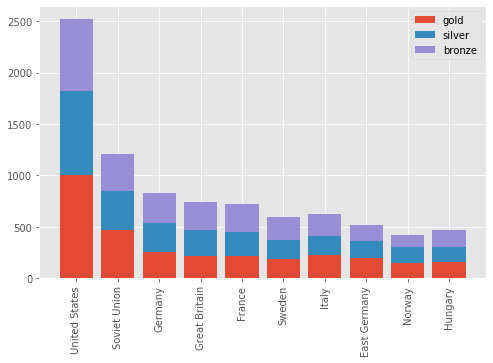

In [22]:
top10_matriz = pd.DataFrame.to_numpy(top10silver)
x = top10_matriz[:,0]
gold = top10_matriz[:,1]
silver = top10_matriz[:,2]
bronze = top10_matriz[:,3]
plt.figure(figsize=(8,5))
plt.bar(x, gold, label='gold')
plt.bar(x, silver, bottom=gold,label='silver')
plt.bar(x, bronze, bottom=gold + silver,label='bronze')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

## Tablas de correlación y contingencia
Supongamos que se desea analizar simultáneamente dos caracteres $x$ e $y$ de una
determinada población. En tal caso, la distribución de frecuencias correspondiente se
representa como ($x_i$, $y_j$, $n_{ij}$), donde $x_i$ e $y_j$ simbolizan un par de valores cualquiera de las
variables $x$ e $y$, y $n_{ij}$ es la **frecuencia bidimensional** o frecuencia absoluta conjunta,
que indica el número de veces que conjuntamente se presenta el par ($x_i$, $y_j$).

Habitualmente, los datos se presentan en una tabla de doble entrada, que se denomina **tabla de correlación** cuando las
observaciones se refieren a variables cuantitativas y **tabla de contingencia** cuando
los datos corresponden a variables cualitativas o atributos.

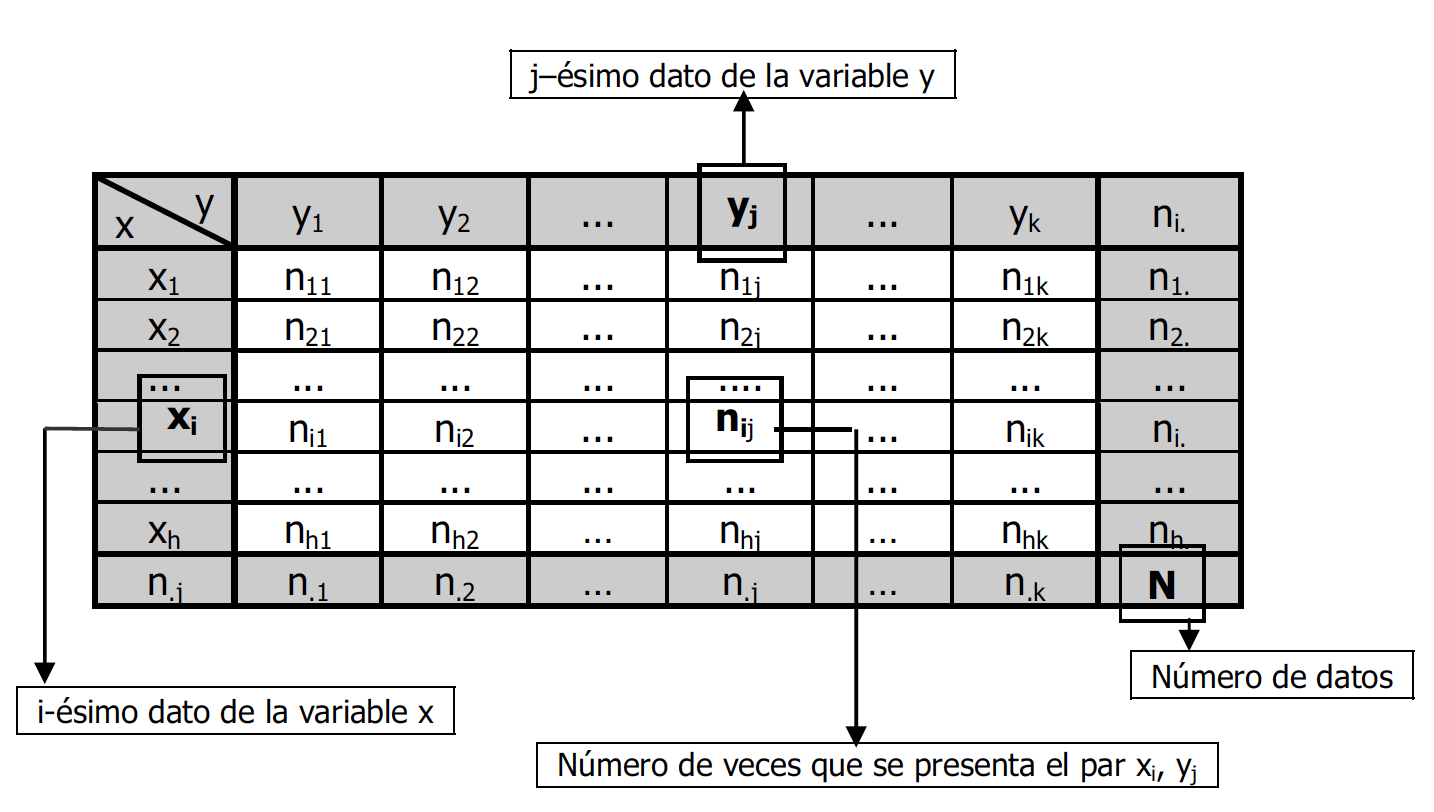

El número de veces que la variable $x$ toma el valor $x_i$ independientemente
del valor que tome la variable $y$ es:
$$n_{i,} = \sum_{j=1}^k n_{i,j}$$

Análogamente el número de veces que la
variable $y$ toma el valor $y_j$ con independencia del valor que toma la variable $x$ se
representa por:
$$n_{,j} = \sum_{i=1}^h n_{i,j}$$

El número de datos es:
$$N = \sum_{i=1}^h n_{i,} = \sum_{j=1}^k n_{,j}$$ 


## Correlación
La correlación es un método estadístico que estudia la relación lineal existente entre dos variables.

### Covarianza
Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la **covarianza**, que indica el grado de variación conjunta de dos variables aleatorias.
$$S_{xy} = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n}= \frac{\sum_{i=1}^h\sum_{j=1}^k(x_i-\bar{x})(y_i-\bar{y})n_{ij}}{N}$$

La covarianza depende de las escalas en que se miden las variables estudiadas, por lo tanto, no es comparable entre distintos pares de variables. Para poder hacer comparaciones se estandariza la covarianza, generando lo que se conoce como coeficientes de correlación (o correlación). Existen diferentes tipos, de entre los que destacan el coeficiente de Pearson y Rho de Spearman.

### Correlación de Pearson
Es la medida adimensional más utilizada para cuantificar el grado de asociación lineal entre
dos variables, que es el resultado de
dividir la covarianza por el producto de las desviaciones típicas de $x$ e $y$.
$$r_{xy} = \frac{S_{xy}}{\sigma_x\sigma_y}$$

La correlación de Pearson toma valores comprendidos entre – 1 y 1. Cuando está
próximo a sus valores extremos indica fuerte asociación lineal, que es perfecta si es
exactamente igual a uno o a menos uno (positiva, si tiende a 1; negativa, si tiende a -1). Cuando está próximo a cero, indica que la asociación lineal entre las
variables es débil, siendo nula cuando es exactamente igual a cero.

### Correlación de Spearman
Se utiliza para tendencias de aumento o disminución, no necesariamente lineales pero sí monótonas (las variables tienden a moverse en la misma dirección relativa, pero no necesariamente a un ritmo constante.
$$r_s = 1 - \frac{6\sum_{i=1}^n d_i}{n(n^2-1)}, \quad \text{con } d_i = (x_i - y_i)$$
$d_i$ es la distancia entre los rangos de observación.

### Ejemplo correlación
Calcular la correlación entre el PIB per capita y la esperanza de vida en multiples paises en el tiempo. En este caso, se esperaría que la expectativa de vida se incremente conforme el PIB per capita tambien se incremente.

In [29]:
!curl -o 'gapminder.csv' https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 81887  100 81887    0     0   132k      0 --:--:-- --:--:-- --:--:--  132k


In [11]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [35]:
gdpPercap = gapminder['gdpPercap']
lifeExp = gapminder['lifeExp']

In [36]:
stats.pearsonr(gdpPercap, lifeExp)

(0.583706219865995, 3.5657242410512533e-156)

In [37]:
stats.spearmanr(gdpPercap,lifeExp)

SpearmanrResult(correlation=0.8264711811970715, pvalue=0.0)

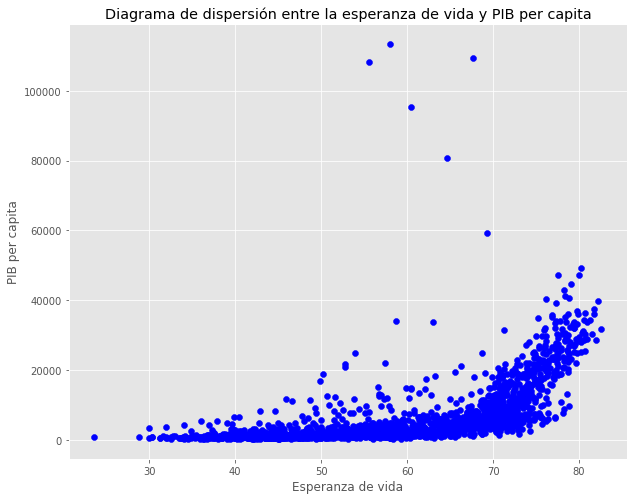

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(x=lifeExp, y=gdpPercap, c='b', marker='o')
plt.xlabel('Esperanza de vida')
plt.ylabel('PIB per capita')
plt.title('Diagrama de dispersión entre la esperanza de vida y PIB per capita')
plt.show()

### Ejercicio Correlación 1
A partir de los datos de iris. Calcule la correlación entre el ancho del pétalo y el largo del sépalo de la especie virginica.

In [ ]:
# Ingrese su código aquí 

In [2]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [3]:
lsepalo = np.array(iris.loc[iris['species']=='virginica','sepal width (cm)'])
lpetalo = np.array(iris.loc[iris['species']=='virginica','petal length (cm)'])

In [4]:
stats.pearsonr(lsepalo, lpetalo)

(0.40104457734278554, 0.0038977040683383264)

In [5]:
stats.spearmanr(lsepalo, lpetalo)

SpearmanrResult(correlation=0.3873586680220017, pvalue=0.005449789148094979)

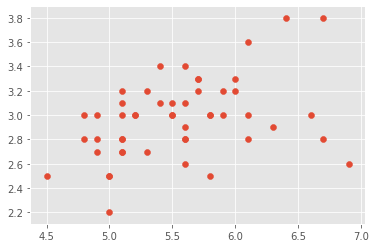

In [6]:
plt.scatter(lpetalo, lsepalo)
plt.show()

### Ejercicio correlación 2
A paritr de los datos de gapminder calcule la correlación de Pearson y de Spearman para responder a la pregunrta: ¿La esperanza de vida esta relacionada con la población?

In [ ]:
# Ingrese su código aquí

In [ ]:
#calculo sperman y perason con la poblacion y con la esperzansa de dia 

### Matriz de correlaciones
Cuando se dispone de múltiples variables y se quiere estudiar la relación entre todas ellas se recurre al cálculo de matrices con el coeficiente de correlación de cada par de variables (pairwise correlation).

In [7]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
import seaborn as sns #libreria grafica lamatriz con heatmap
correlacion = iris.corr()  #podemos hacer ese calculo directamente
correlacion #matriz simetrica 
# variables de correlacion a 1, en este caso 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


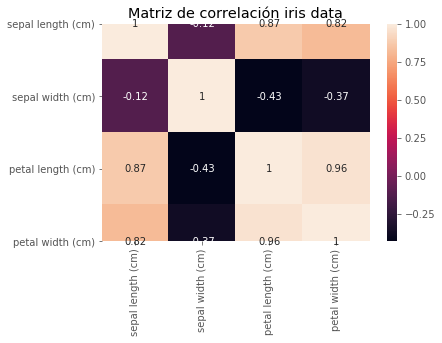

In [10]:
sns.heatmap(correlacion, annot=True)
plt.title("Matriz de correlación iris data")

plt.show()

In [12]:
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [18]:
correlacion_2 = gapminder.corr(method='spearman') 
correlacion_2
#corr de percap y esperanza de vida

,year,pop,lifeExp,gdpPercap
year,1.000000,0.219808,0.445865,0.226905
pop,0.219808,1.000000,0.180612,0.052252
lifeExp,0.445865,0.180612,1.000000,0.826471
gdpPercap,0.226905,0.052252,0.826471,1.000000


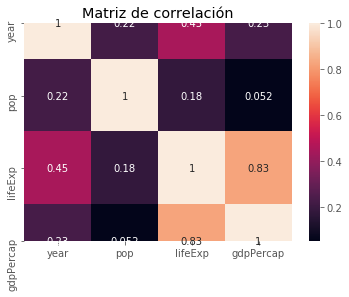

In [19]:
sns.heatmap(correlacion_2, annot=True)
plt.title("Matriz de correlación")

plt.show()

## Regresión lineal simple
La correlación cuantifica como están relacionadas dos variables, mientras que la regresión lineal consiste en generar una ecuación (modelo) que, basándose en la relación existente entre ambas variables, permita predecir el valor de una variable a partir de la otra.

El término **simple** indica que en la relación sólo hay dos variables implicadas; es
decir, sólo vamos a ocuparnos del caso bivariante. El término **lineal** hace referencia a
la forma que adopta la relación.  Cuando la
regresión es lineal, la relación se formaliza mediante una función lineal, lo que en
términos gráficos equivale a que la nube de puntos del diagrama de dispersión que
representa las observaciones de las variables esté, aproximadamente, sobre una línea
recta. De hecho, lo que se pretende con la regresión lineal es encontrar la ecuación de
la recta sobre la que aproximadamente se alinean los puntos de la nube.

En cuanto al término **regresión**, fue utilizado por [Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton) en un estudio relativo a
las estaturas de una determinada población, con el objetivo de analizar si existía
alguna relación entre las estaturas de los padres y las de los hijos. En dicho estudio se
observó que los hijos de padres altos eran, por término medio, más altos que la media
de la población, pero más bajos que sus padres. Igualmente, los hijos de padres bajos
eran, por término medio, más bajos que la media de la población pero más altos que
sus padres. Había, por tanto, según Galton, una tendencia de las estaturas de los hijos,
tanto de padres altos como de padres bajos, a moverse, a volver o a "regresar" a la
estatura media de la población.
* El análisis de regresión lineal simple se utiliza para analizar la relación entre
dos variables bajo la hipótesis de que es causal; es decir, debe suponerse que una de
las variables ($x$) es la causa de la otra ($y$), que es el efecto. Obviamente, la técnica es
aplicable aunque la relación entre las variables sea no causal, pero no tiene sentido y
puede conducir a conclusiones erróneas. 
* La variable que se supone **dependiente** ($y$) se
denomina también *explicada*, *endógena* o *regresando*. La variable que se supone **independiente** ($x$) se denomina también *explicativa*, *exógena* o *regresor*.
* La relación entre las variables se supone unilateral, tiene un solo sentido; $x$ es
causa de $y$ pero $y$ no es causa de $x$; por tanto, no existe interdependencia.
* La relación entre las variables es inexacta o de tipo estadístico. Como ya hemos visto a partir de los diagramas de dispersión, aunque las variables $x$ e $y$ estén muy relacionadas, si representamos en el plano pares de valores observados de $x$ y de $y$, no encontramos una línea sino una nube de puntos que puede estar más o menos concentrada alrededor de una línea "ideal". Aunque la nube de puntos puede estar muy concentrada, por ejemplo, alrededor de una recta, no todos los puntos están sobre la recta. Luego, las observaciones de $x$ y de $y$ no se ajustan a una ley matemática, que asigna a cada valor de $x$ un valor dado de $y$, sino que la relación que existe entre ellas es de tipo estocástico, existe un conjunto de posibles valores de $y$ para cada valor dado de $x$.

El modelo de regresión lineal supone que,
$$ y = \alpha + \beta x + \epsilon$$
* $\alpha$ es la ordenada en el origen.
* $\beta$ es la pendiente de la recta.
* $\epsilon$ es el error aleatorio y representa la diferencia entre el valor ajustado por la recta y el valor real. Al error aleatorio también se le conoce como residuo.

### Regresión por mínimos cuadrados
[Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) propuso en 1809 el método de mìnimos cuadrados para obtener los valores de $\alpha$ y $\beta$ que mejor se ajustaran a los datos.

Siendo $\hat{y}_i=\alpha+\beta x_i$ las predicciones de yi, el residuo o diferencia entre la predicción y el valor real es:
$$\epsilon_i = y_i -\hat{y}_i$$
El método de mínimos cuadrados obtendrá los coeficientes que minimicen la suma de residuos al cuadrado, es decir, que minimicen:
$$\chi^2 = \sum_{i=1}^n \epsilon_i^2$$

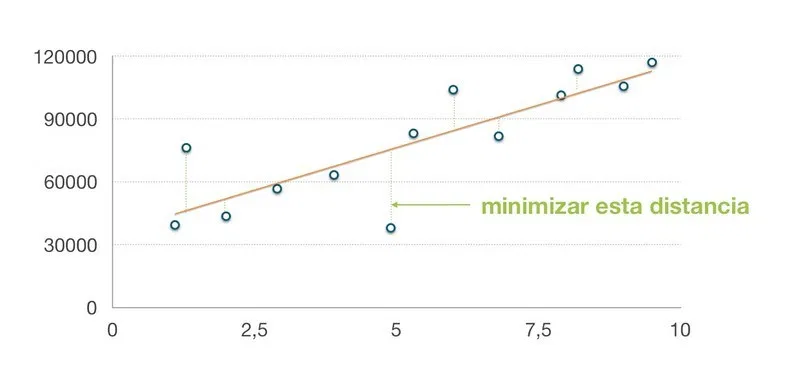

Por lo tanto los valores de $\alpha$ y $\beta$ que cumplen con esta condición son:

$$\beta = \frac{S_{xy}}{\sigma_x^2} = \frac{\sigma_y}{\sigma_x}r_{xy},$$
$$\alpha = \bar{y} - \beta\bar{x}.$$

Donde $r_{xy}$ es el coeficiente de correlación de Pearson, $\sigma_x$ y $\sigma_y$ son las desviaciones típicas de cada variable.

#### Ejemplo regresión lineal simple método de mínimos cuadrados
Los datos de la producción de trigo en toneladas ($x$) y el precio del kilo de harina en pesetas ($y$) en la década de los 80 en España fueron:

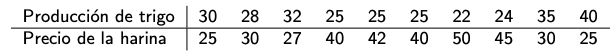

Ajustar la recta de regresión por el método de mínimos cuadrados.

In [20]:
x = np.array([30,28,32,25,25,25,22,24,35,40])
y = np.array([25,30,27,40,42,40,50,45,30,25])

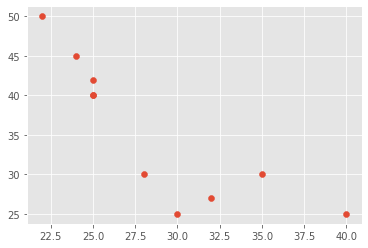

In [21]:
plt.scatter(x,y)
plt.show()

Haciendo el cálculo de manera manual se tiene que:
$$\beta = \frac{\sum_{i=1}^{10}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{10} (x_i - \bar{x})^2} = -1.3537$$
$$\alpha = \bar{y} - \beta\bar{x} = 74.116$$

In [23]:
sx = np.std(x)
sy = np.std(y)
rxy = stats.pearsonr(x,y)
b = sy*rxy[0]/sx
print(b)

-1.3536754507628295


In [24]:
yprom = np.mean(y)
xprom = np.mean(x)
a = yprom - (b*xprom)
print(a)

74.11511789181692


Ahora vamos a usar la función *linregress* que se encuentra en el módulo stats de la libreria scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [25]:
# libreria scipy, modulo stats.linregrees, me devuelve la pendiente y el intercepto
regresion = stats.linregress(x,y)
print(f'pendiente: {regresion.slope}')
print(f'intercepto: {regresion.intercept}')

pendiente: -1.3536754507628295
intercepto: 74.11511789181692


## Ejercicio general (cancer de mama)

A partir de los datos de cancer de mama encontrar: 
* La matriz de correlaciones de las variables que estan en el dataframe.
* Las variables que tienen una correlación mayores a 0.75
* Hacer la regresión lineal para cada para de variables.

In [26]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names
df = pd.DataFrame(data, columns = features)

In [27]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
matriz = pd.DataFrame.to_numpy(df)
matriz

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [29]:
# Ingrese su código aquí
correlacion_3 = df.corr() 
correlacion_3

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [43]:
# corr mean radius  b- mean perimeter a
# corr mean radius b- mean area m
# corr mean radius b- worst radius j
# corr mean radius b- worst perimeter k
# corr mean radius b- mean concave points l
b = matriz[:,0] #mean radius
a = matriz[:,2] #mean perimeter
m = matriz[:,3] #mean area
j = matriz[:,20] #worst radius
k = matriz[:,22] #worst perimeter
l = matriz[:,7] #mean concave pints

In [37]:
regresion = stats.linregress(b,a)
print(f'pendiente: {regresion.slope}')
print(f'intercepto: {regresion.intercept}')

pendiente: 6.880400289601546
intercepto: -5.232388786540369


In [38]:
regresion = stats.linregress(b,m)
print(f'pendiente: {regresion.slope}')
print(f'intercepto: {regresion.intercept}')

pendiente: 98.59821921514536
intercepto: -738.03670419575


In [39]:
regresion = stats.linregress(b,j)
print(f'pendiente: {regresion.slope}')
print(f'intercepto: {regresion.intercept}')

pendiente: 1.3297250711894606
intercepto: -2.5162242078671753


In [40]:
regresion = stats.linregress(b,k)
print(f'pendiente: {regresion.slope}')
print(f'intercepto: {regresion.intercept}')

pendiente: 9.202778424740465
intercepto: -22.749122970137208


In [44]:
regresion = stats.linregress(b,l)
print(f'pendiente: {regresion.slope}')
print(f'intercepto: {regresion.intercept}')

pendiente: 0.009056754948745947
intercepto: -0.07902827350772043


###### De otra forma mas cortita y mejor

In [47]:
corr_sp = df.corr(method = 'spearman')
corr_sp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
mean texture,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
mean perimeter,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
mean area,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
mean smoothness,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
mean compactness,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
mean concavity,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
mean concave points,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
mean symmetry,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069
mean fractal dimension,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,...,-0.294540,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771


In [51]:
# data frame con los valores que yo quiera 
# unsteak cambio a una fila
corr_df = corr_sp.unstack()
corr_df[corr_df > 0.75]

mean radius              mean radius                1.000000
                         mean perimeter             0.997802
                         mean area                  0.999602
                         mean concave points        0.759702
                         worst radius               0.978604
                                                      ...   
worst concave points     worst concave points       1.000000
worst symmetry           worst symmetry             1.000000
worst fractal dimension  mean fractal dimension     0.760771
                         worst compactness          0.762247
                         worst fractal dimension    1.000000
Length: 154, dtype: float64

In [52]:
# loc, le voy a decir al data frame elijo una parte o conjunto de datos
df.loc[df['mean radius']==df['mean radius'].max()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525


In [55]:
# genero esa subconjunto con esa condicion.
# manipulacion de un conjunto de datos
df.loc[df['mean radius']>19, ['mean area', 'mean perimeter']]

,mean area,mean perimeter
1,1326.0,132.9
2,1203.0,130.0
4,1297.0,135.1
12,1123.0,132.4
18,1260.0,130.0
...,...,...
535,1308.0,137.8
563,1347.0,143.0
564,1479.0,142.0
565,1261.0,131.2
